In [ ]:
# Data Preprocessing
import pandas as pd
import numpy as np
import timeit
from sklearn.preprocessing import StandardScaler #normalisasi z-score
# Data VizualizationS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# DataFrame
data = pd.read_excel("data_penelitian.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nip                     3655 non-null   int64 
 1   usia                    3655 non-null   int64 
 2   jenis_kelamin           3655 non-null   object
 3   masa_kerja              3655 non-null   int64 
 4   satuan_kerja            3655 non-null   object
 5   unit_satuan             3655 non-null   object
 6   ketersediaan_sistem     3655 non-null   int64 
 7   kemampuan_sistem        3655 non-null   int64 
 8   kemudahan_penggunaan    3655 non-null   int64 
 9   kemudahan_fasilitas     3655 non-null   int64 
 10  tingkat_pelayanan       3655 non-null   int64 
 11  ketersediaan_bantuan    3655 non-null   int64 
 12  kualitas_materi         3655 non-null   int64 
 13  kualitas_kuis           3655 non-null   int64 
 14  kualitas_video          3655 non-null   int64 
 15  kual

In [ ]:
# Cek duplikasi data
cekduplikasi1 = data.duplicated(subset=["nip"])
cekduplikasi1.value_counts()

False    3619
True       36
Name: count, dtype: int64

In [ ]:
# Menghapus duplikasi data
data = data.drop_duplicates(subset="nip")

In [ ]:
# Cek hasil penanganan duplikasi
cekduplikasi2 = data.duplicated(subset=["nip"])
cekduplikasi2.value_counts()

False    3619
Name: count, dtype: int64

In [ ]:
# Cek missing value
print(data.isnull().sum())
print()
print(data.describe())

nip                       0
usia                      0
jenis_kelamin             0
masa_kerja                0
satuan_kerja              0
unit_satuan               0
ketersediaan_sistem       0
kemampuan_sistem          0
kemudahan_penggunaan      0
kemudahan_fasilitas       0
tingkat_pelayanan         0
ketersediaan_bantuan      0
kualitas_materi           0
kualitas_kuis             0
kualitas_video            0
kualitas_gambartulisan    0
konsistensi_informasi     0
dtype: int64

                nip         usia   masa_kerja  ketersediaan_sistem  \
count  3.619000e+03  3619.000000  3619.000000          3619.000000   
mean   1.985038e+17    38.029014    15.003868             4.634982   
std    8.487507e+14     8.488309     8.015945             0.586095   
min    1.960122e+17    22.000000     1.000000             1.000000   
25%    1.980072e+17    32.000000     9.000000             4.000000   
50%    1.987032e+17    36.000000    14.000000             5.000000   
75%    1.991073e+17 

In [ ]:
# Select attribute
data = data[["usia","jenis_kelamin","masa_kerja","ketersediaan_sistem",
             "kemampuan_sistem","kemudahan_penggunaan","kemudahan_fasilitas",
             "tingkat_pelayanan","ketersediaan_bantuan","kualitas_materi",
             "kualitas_kuis","kualitas_video","kualitas_gambartulisan",
             "konsistensi_informasi"]]

In [ ]:
# Encode 'jenis_kelamin'
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-laki':1, 'Perempuan':2})

In [ ]:
# Normalisasi Z-Score
# Pemilihan fitur untuk Normalisasi
columns_to_normalize = ["usia","jenis_kelamin", "masa_kerja",
                        "ketersediaan_sistem", "kemampuan_sistem",
                        "kemudahan_penggunaan", "kemudahan_fasilitas",
                        "tingkat_pelayanan", "ketersediaan_bantuan",
                        "kualitas_materi", "kualitas_kuis",
                        "kualitas_video", "kualitas_gambartulisan",
                        "konsistensi_informasi"]

X = data[columns_to_normalize]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kembalikan hasil normalisasi ke DataFrame
data_normalized = pd.DataFrame(X_scaled, columns=columns_to_normalize)
data_normalized['z_score'] = data_normalized.mean(axis=1)

# Save to Excel
data_normalized.to_excel("normalized_data.xlsx", index=False)

data_normalized.head(10)

,usia,jenis_kelamin,masa_kerja,ketersediaan_sistem,kemampuan_sistem,kemudahan_penggunaan,kemudahan_fasilitas,tingkat_pelayanan,ketersediaan_bantuan,kualitas_materi,kualitas_kuis,kualitas_video,kualitas_gambartulisan,konsistensi_informasi,z_score
0,2.942216,-0.742891,3.243501,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,-0.022754
1,2.824390,-0.742891,3.243501,0.622882,0.595097,-0.884764,0.645392,-0.907664,-0.981151,-0.706554,0.702921,-0.671659,0.735537,0.673389,0.367745
2,2.706565,-0.742891,2.619658,-1.083560,0.595097,-1.783435,-1.185074,-1.719937,-1.833885,-2.222724,-3.032572,-2.130682,-1.066703,-1.135812,-0.858283
3,2.706565,1.346093,3.118732,0.622882,-1.329528,-1.783435,0.645392,-1.719937,-1.833885,-2.222724,0.702921,-2.130682,0.735537,-2.945013,-0.291934
4,2.706565,1.346093,3.118732,0.622882,-1.329528,-1.783435,0.645392,-0.907664,-1.833885,-2.222724,-3.032572,-2.130682,-2.868942,-2.945013,-0.758199
5,2.706565,-0.742891,3.118732,0.622882,0.595097,-1.783435,0.645392,-0.907664,-0.981151,-1.464639,0.702921,-1.401170,0.735537,0.673389,0.179969
6,2.588740,1.346093,3.118732,0.622882,0.595097,-1.783435,0.645392,-1.719937,-1.833885,-2.222724,0.702921,-2.130682,0.735537,0.673389,0.095580
7,2.588740,1.346093,2.619658,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,0.056651
8,2.588740,-0.742891,2.120583,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,-0.128211
9,2.588740,1.346093,1.995815,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,-1.164826,-2.130682,-1.066703,-1.135812,-0.379280


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

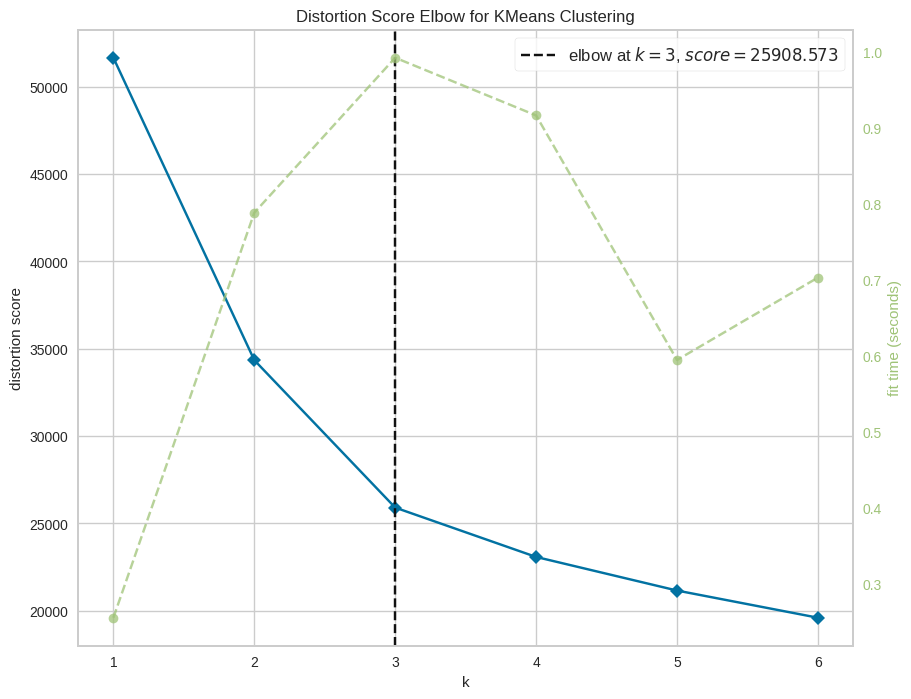

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow (data_normalized)
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(data_normalized)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

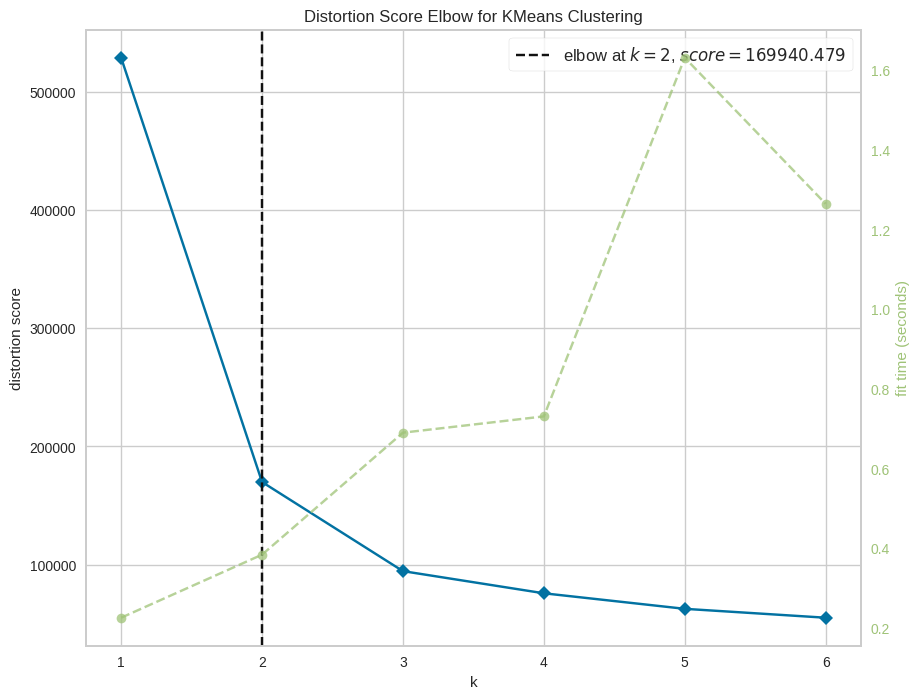

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(data)
visualizer.show()

In [ ]:
# Catat waktu mulai
start1 = timeit.default_timer()

# Penerapan K-Means clustering
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(data)
y_kmeans = kmeans.fit_predict(data)

# Hitung waktu komputasi KMeans
stop1 = timeit.default_timer()
# Time execution
waktu_komputasi1 = stop1 - start1
print(waktu_komputasi1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1.5317732030000002


In [ ]:
# Simpan prediksi cluster KMeans sebagai atribut
data['y_kmeans']=y_kmeans
#Cek jumlah data pada setiap cluster terbentuk
print(data['y_kmeans'].value_counts)
print(data['y_kmeans'].value_counts())

# Save to Excel
data.to_excel("kmeans_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3650    0
3651    0
3652    0
3653    0
3654    0
Name: y_kmeans, Length: 3619, dtype: int32>
y_kmeans
0    2633
1     986
Name: count, dtype: int64


In [ ]:
# Catat waktu mulai
start2 = timeit.default_timer()

# Penerapan K-Means++ clustering
kmeansplus = KMeans(init='k-means++',n_clusters=2,random_state=42)
# Membuat prediksi
y_kmeansplus = kmeansplus.fit_predict(data)

# Hitung waktu komputasi KMeans++
stop2 = timeit.default_timer()
# Time execution
waktu_komputasi2 = stop2 - start2
print(waktu_komputasi2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1.169552025999991


In [ ]:
# Simpan prediksi cluster KMeans++ sebagai atribut
data['y_kmeansplus']=y_kmeansplus
#Cek jumlah data pada setiap cluster terbentuk
print(data['y_kmeansplus'].value_counts)
print(data['y_kmeansplus'].value_counts())

# Save to Excel
data.to_excel("kmeansplus_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3650    0
3651    0
3652    0
3653    0
3654    0
Name: y_kmeansplus, Length: 3619, dtype: int32>
y_kmeansplus
0    2633
1     986
Name: count, dtype: int64


In [ ]:
# Performa KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(data, kmeans_labels)
print("Silhouette Score untuk KMeans:", kmeans_silhouette_score)
print('Jumlah Iterasi K-Means= ',getattr(kmeans,'n_iter_'))
print("Durasi Komputasi K-Means= ",waktu_komputasi1,"Detik")

# Performa KMeans++ clustering
kmeans_plus = KMeans(init='k-means++', n_clusters=2, random_state=42)
kmeans_plus.fit(data)
kmeans_plus_labels = kmeans_plus.labels_
kmeans_plus_silhouette_score = silhouette_score(data, kmeans_plus_labels)
print("Silhouette Score untuk KMeans++:", kmeans_plus_silhouette_score)
print('Jumlah Iterasi K-Means++= ',getattr(kmeansplus,'n_iter_'))
print("Durasi Komputasi K-Means++ = ",waktu_komputasi2,"Detik")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans: 0.6034708462746707
Jumlah Iterasi K-Means=  9
Durasi Komputasi K-Means=  1.5317732030000002 Detik


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans++: 0.6034708462746707
Jumlah Iterasi K-Means++=  9
Durasi Komputasi K-Means++ =  1.169552025999991 Detik


In [ ]:
# Performa KMeans clustering pada data non normalized
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(data)
y_kmeans = kmeans.fit_predict(data)
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(data, kmeans_labels)
print("Silhouette Score untuk KMeans non-Normalisasi:", kmeans_silhouette_score)

# Performa KMeans clustering pada data_normalized
kmeans_normalized = KMeans(n_clusters=3,random_state=42)
kmeans_normalized.fit(data_normalized)
y_kmeans_normalized = kmeans.fit_predict(data_normalized)
kmeans_labels_normalized = kmeans_normalized.labels_
kmeans_normalized_sc = silhouette_score(data_normalized, kmeans_labels_normalized)
print("Silhouette Score untuk KMeans (Normalisasi):", kmeans_normalized_sc)

# Performa KMeans++ clustering pada data non normalized
kmeans_plus = KMeans(init='k-means++', n_clusters=2, random_state=42)
kmeans_plus.fit(data)
y_kmeansplus = kmeansplus.fit_predict(data)
kmeans_plus_labels = kmeans_plus.labels_
kmeans_plus_silhouette_score = silhouette_score(data, kmeans_plus_labels)
print("Silhouette Score untuk KMeans++ (Normalisasi):", kmeans_plus_silhouette_score)

# Performa KMeans++ clustering pada data_normalized
kmeansplus_normalized = KMeans(init='k-means++', n_clusters=3, random_state=42)
kmeansplus_normalized.fit(data_normalized)
y_kmeansplus_normalized = kmeansplus.fit_predict(data_normalized)
kmeansplus_labels_normalized = kmeansplus_normalized.labels_
kmeansplus_normalized_sc = silhouette_score(data_normalized, kmeansplus_labels_normalized)
print("Silhouette Score untuk KMeans++ (Normalisasi):", kmeansplus_normalized_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans non-Normalisasi: 0.6034708462746707


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans (Normalisasi): 0.363223850574965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans++ (Normalisasi): 0.6034708462746707


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans++ (Normalisasi): 0.363223850574965


In [ ]:
# Cek hasil cluster yang dihasilkan pada kedua metode
a = list(data["y_kmeansplus"])
b = list(data["y_kmeans"])

sm = 0
bd = 0
for x in a :
  if a==b :
    sm = sm+1
  if a!=b :
    bd = bd+1

print("Jumlah cluster yang sama = ",sm)
print("Jumlah cluster yang berbeda = ",bd)

Jumlah cluster yang sama =  3619
Jumlah cluster yang berbeda =  0


Text(0.5, 1.0, 'M. Konsistensi Informasi')

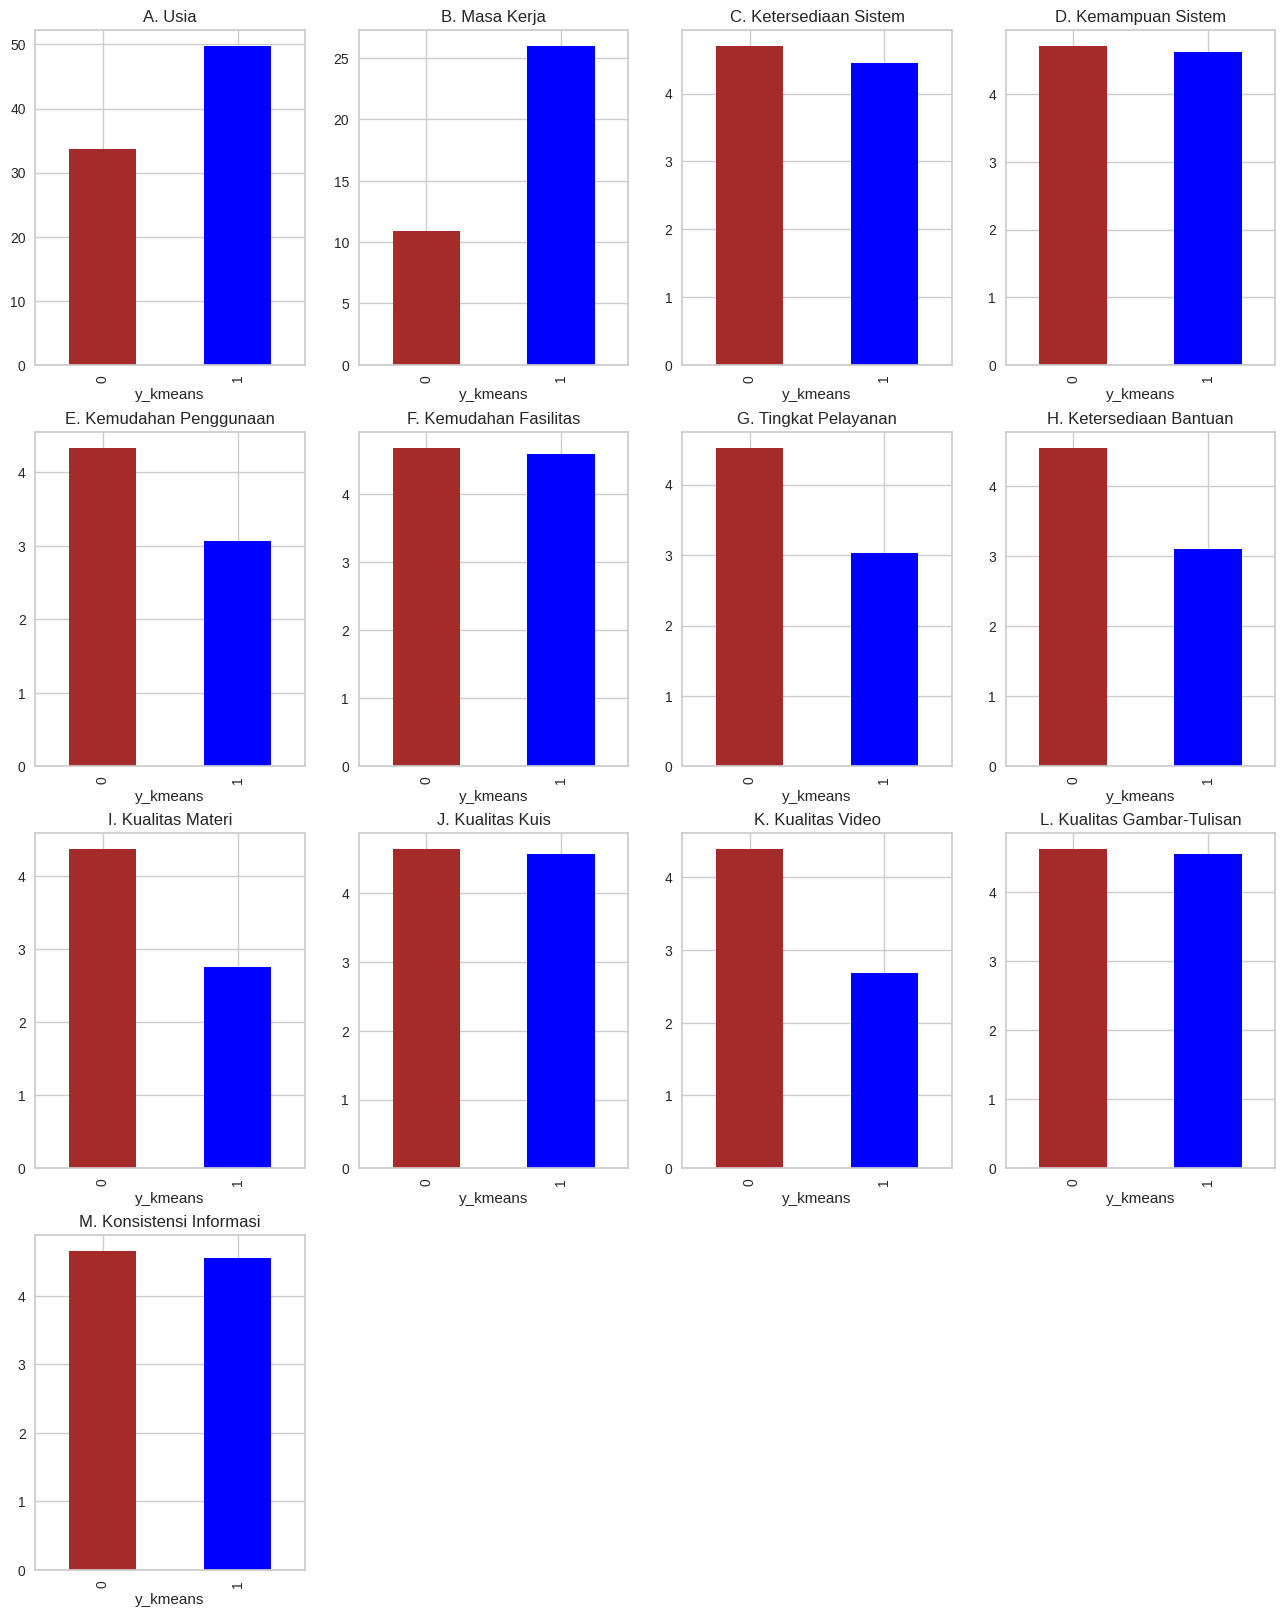

In [ ]:
# Visualisasi hasil cluster KMeans
plt.rcParams["figure.figsize"] = [16,20]

plt.subplot(4,4,1)
data.groupby('y_kmeans')['usia'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("A. Usia")

plt.subplot(4,4,2)
data.groupby('y_kmeans')['masa_kerja'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("B. Masa Kerja")

plt.subplot(4,4,3)
data.groupby('y_kmeans')['ketersediaan_sistem'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("C. Ketersediaan Sistem")

plt.subplot(4,4,4)
data.groupby('y_kmeans')['kemampuan_sistem'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("D. Kemampuan Sistem")

plt.subplot(4,4,5)
data.groupby('y_kmeans')['kemudahan_penggunaan'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("E. Kemudahan Penggunaan")

plt.subplot(4,4,6)
data.groupby('y_kmeans')['kemudahan_fasilitas'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("F. Kemudahan Fasilitas")

plt.subplot(4,4,7)
data.groupby('y_kmeans')['tingkat_pelayanan'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("G. Tingkat Pelayanan")

plt.subplot(4,4,8)
data.groupby('y_kmeans')['ketersediaan_bantuan'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("H. Ketersediaan Bantuan")

plt.subplot(4,4,9)
data.groupby('y_kmeans')['kualitas_materi'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("I. Kualitas Materi")

plt.subplot(4,4,10)
data.groupby('y_kmeans')['kualitas_kuis'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("J. Kualitas Kuis")

plt.subplot(4,4,11)
data.groupby('y_kmeans')['kualitas_video'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("K. Kualitas Video")

plt.subplot(4,4,12)
data.groupby('y_kmeans')['kualitas_gambartulisan'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("L. Kualitas Gambar-Tulisan")

plt.subplot(4,4,13)
data.groupby('y_kmeans')['konsistensi_informasi'].mean().plot(kind='bar',color=['brown', 'blue'])
plt.title("M. Konsistensi Informasi")

Text(0.5, 1.0, 'M. Konsistensi Informasi')

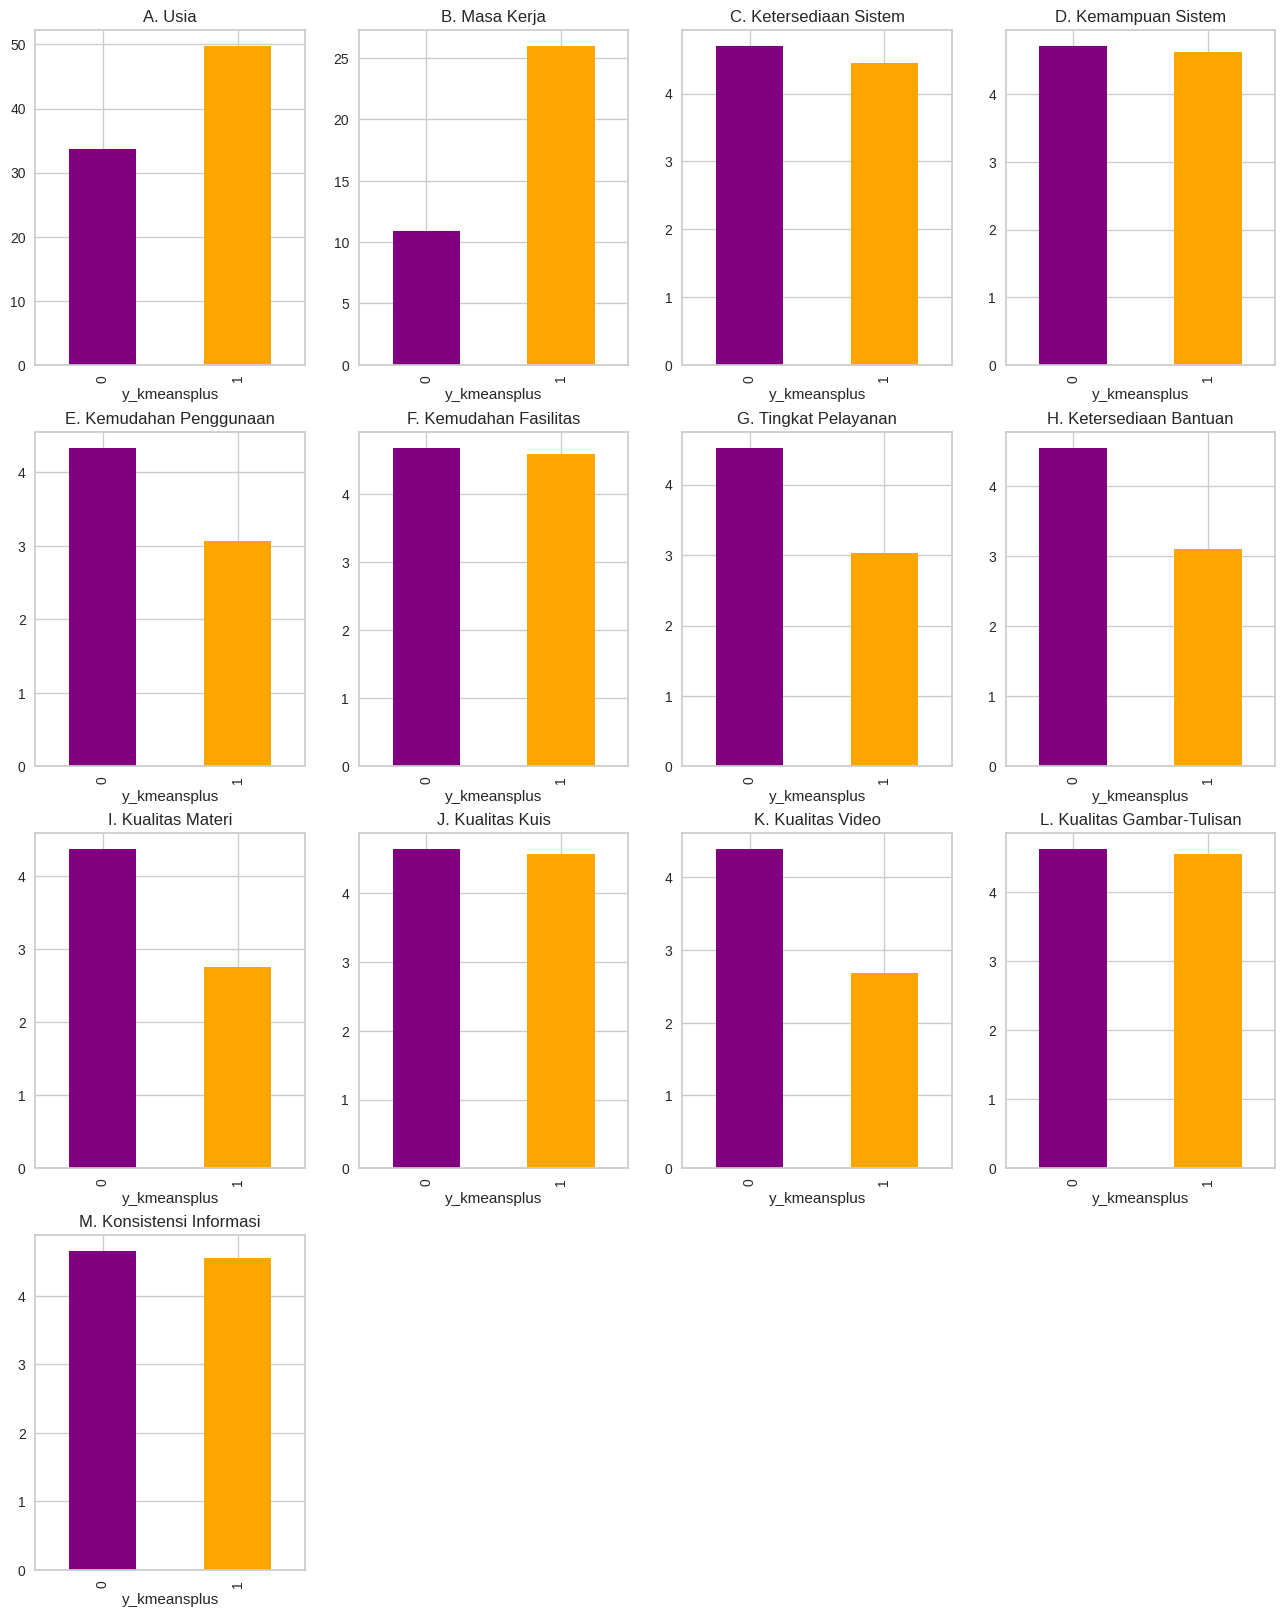

In [ ]:
# Visualisasi hasil cluster KMeans++
plt.rcParams["figure.figsize"] = [16,20]

plt.subplot(4,4,1)
data.groupby('y_kmeansplus')['usia'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("A. Usia")

plt.subplot(4,4,2)
data.groupby('y_kmeansplus')['masa_kerja'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("B. Masa Kerja")

plt.subplot(4,4,3)
data.groupby('y_kmeansplus')['ketersediaan_sistem'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("C. Ketersediaan Sistem")

plt.subplot(4,4,4)
data.groupby('y_kmeansplus')['kemampuan_sistem'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("D. Kemampuan Sistem")

plt.subplot(4,4,5)
data.groupby('y_kmeansplus')['kemudahan_penggunaan'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("E. Kemudahan Penggunaan")

plt.subplot(4,4,6)
data.groupby('y_kmeansplus')['kemudahan_fasilitas'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("F. Kemudahan Fasilitas")

plt.subplot(4,4,7)
data.groupby('y_kmeansplus')['tingkat_pelayanan'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("G. Tingkat Pelayanan")

plt.subplot(4,4,8)
data.groupby('y_kmeansplus')['ketersediaan_bantuan'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("H. Ketersediaan Bantuan")

plt.subplot(4,4,9)
data.groupby('y_kmeansplus')['kualitas_materi'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("I. Kualitas Materi")

plt.subplot(4,4,10)
data.groupby('y_kmeansplus')['kualitas_kuis'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("J. Kualitas Kuis")

plt.subplot(4,4,11)
data.groupby('y_kmeansplus')['kualitas_video'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("K. Kualitas Video")

plt.subplot(4,4,12)
data.groupby('y_kmeansplus')['kualitas_gambartulisan'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("L. Kualitas Gambar-Tulisan")

plt.subplot(4,4,13)
data.groupby('y_kmeansplus')['konsistensi_informasi'].mean().plot(kind='bar',color=['purple','orange'])
plt.title("M. Konsistensi Informasi")

In [ ]:
# Ubah data frame menjadi Array
data = np.array(data)

# Cek y_means (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeans, pd.Series):
    y_kmeans = y_kmeans.to_numpy()

# Perhitungan mean cluster
cluster_means = []
for i in range(np.max(y_kmeans) + 1):
    cluster_data = data[y_kmeans == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

# Print mean cluster pada setiap atribut
for i, mean in enumerate(cluster_means):
    print(f"Cluster {i+1} mean:", mean)

Cluster 1 mean: [33.62932017  1.39118876 10.89327763  4.70262058  4.71591341  4.33118116
  4.67451576  4.52449677  4.54538549  4.37143942  4.64033422  4.38245348
  4.6118496   4.65514622  0.          0.        ]
Cluster 2 mean: [49.77789047  1.26064909 25.98073022  4.45436105  4.62373225  3.05882353
  4.57505071  3.03042596  3.09634888  2.75862069  4.57910751  2.68762677
  4.53853955  4.55476673  1.          1.        ]


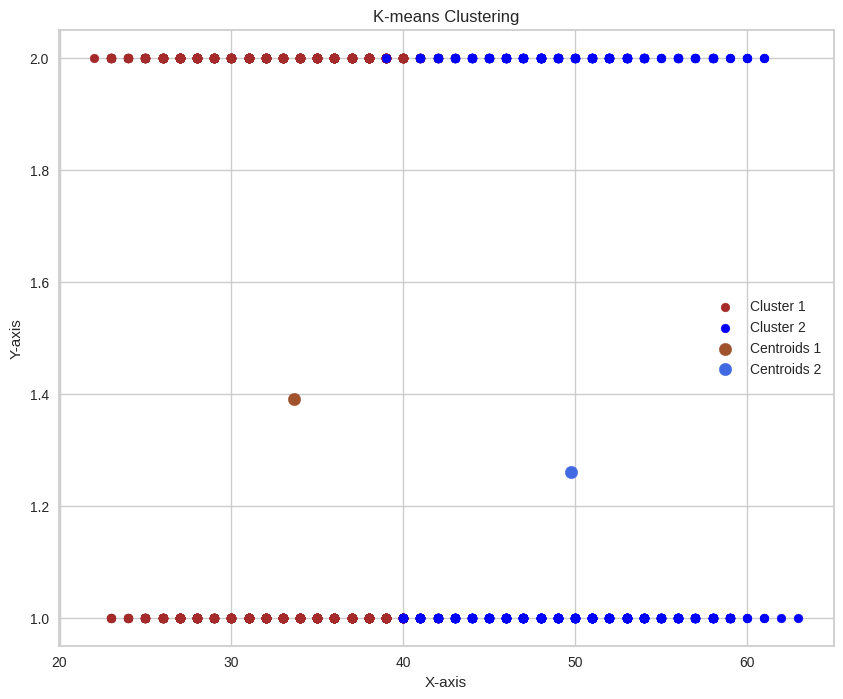

In [ ]:
# Ubah data frame menjadi Array
data = np.array(data)

# Cek y_kmeans (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeans, pd.Series):
    y_kmeans = y_kmeans.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=40, c='brown', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=40, c='blue', label='Cluster 2')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=80, c='sienna', label='Centroids 1')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=80, c='royalblue', label='Centroids 2')

plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [ ]:
# Ubah data frame menjadi Array
data = np.array(data)

# Cek y_kmeans (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeansplus, pd.Series):
    y_kmeansplus = y_kmeansplus.to_numpy()

# Perhitungan mean cluster
cluster_means = []
for i in range(np.max(y_kmeansplus) + 1):
    cluster_data = data[y_kmeansplus == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

# Print mean cluster pada setiap atribut
for i, mean in enumerate(cluster_means):
    print(f"Cluster {i+1} mean:", mean)

Cluster 1 mean: [33.62932017  1.39118876 10.89327763  4.70262058  4.71591341  4.33118116
  4.67451576  4.52449677  4.54538549  4.37143942  4.64033422  4.38245348
  4.6118496   4.65514622  0.          0.        ]
Cluster 2 mean: [49.77789047  1.26064909 25.98073022  4.45436105  4.62373225  3.05882353
  4.57505071  3.03042596  3.09634888  2.75862069  4.57910751  2.68762677
  4.53853955  4.55476673  1.          1.        ]


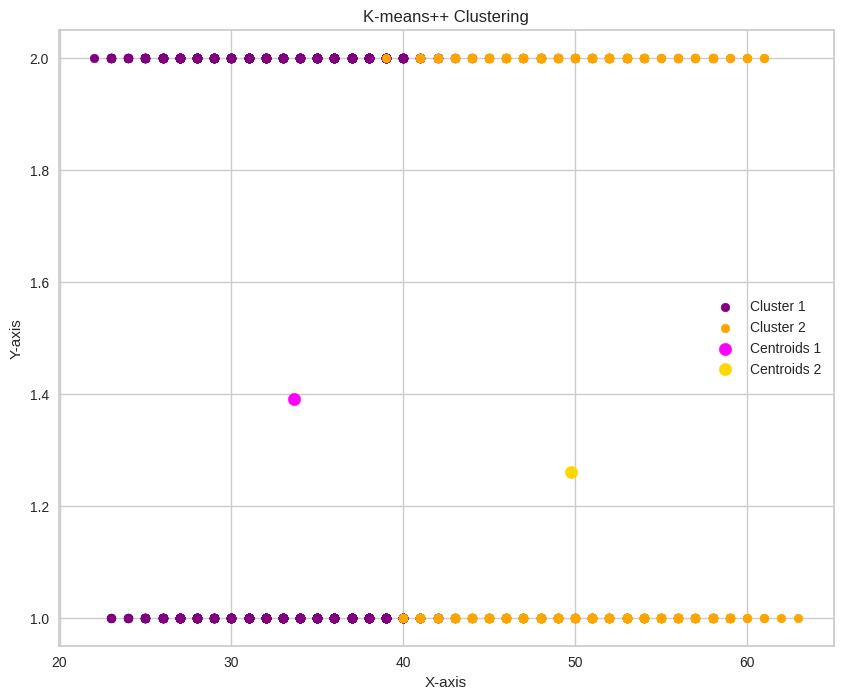

In [ ]:
# Ubah data frame menjadi Array
data = np.array(data)

# Cek y_kmeans (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeansplus, pd.Series):
    y_kmeansplus = y_kmeansplus.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeansplus == 0, 0], data[y_kmeansplus == 0, 1], s=40, c='purple', label='Cluster 1')
plt.scatter(data[y_kmeansplus == 1, 0], data[y_kmeansplus == 1, 1], s=40, c='orange', label='Cluster 2')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeansplus.cluster_centers_[0, 0], kmeansplus.cluster_centers_[0, 1], s=80, c='magenta', label='Centroids 1')
plt.scatter(kmeansplus.cluster_centers_[1, 0], kmeansplus.cluster_centers_[1, 1], s=80, c='gold', label='Centroids 2')

plt.title('K-means++ Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()